# Performing EDA

This file performs the task of EDA(Exploratory Data Analysis) on the English Premier League Statistics from 2021-2022. 
In this process, we will be able to find the best/most successful team and players. 

## Importing libraries

In [163]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Importing data

In [164]:
#match result data
match_res = pd.read_csv('data/soccer21-22.csv')
match_res.head(5)

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,...,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,Man United,Leeds,5,1,H,1,0,H,P Tierney,...,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,Burnley,Brighton,1,2,A,1,0,H,D Coote,...,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,...,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,Everton,Southampton,3,1,H,0,1,A,A Madley,...,6,3,13,15,6,8,2,0,0,0


In [165]:
match_res.isnull().sum()

Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [166]:
player_stats = pd.read_csv('data/all_players_stats.csv')
player_stats.head(5)

,Team,JerseyNo,Player,Position,Apearances,Substitutions,Goals,Penalties,YellowCards,RedCards
0,Arsenal,7,Bukayo Saka,Defender/Midfielder,40,3,12,2,6.0,0.0
1,Arsenal,6,Gabriel,Defender,37,1,5,0,7.0,1.0
2,Arsenal,32,Aaron Ramsdale,Goalkeeper,37,0,0,0,1.0,0.0
3,Arsenal,4,Ben White,Defender,37,0,0,0,3.0,0.0
4,Arsenal,8,Martin Odegaard,Midfielder,36,4,7,0,4.0,0.0


In [167]:
player_stats.isnull().sum()

Team             0
JerseyNo         0
Player           0
Position         0
Apearances       0
Substitutions    0
Goals            0
Penalties        0
YellowCards      0
RedCards         0
dtype: int64

In [168]:
player_stats.drop(['JerseyNo','Substitutions'],axis=1,inplace=True)
player_stats

,Team,Player,Position,Apearances,Goals,Penalties,YellowCards,RedCards
0,Arsenal,Bukayo Saka,Defender/Midfielder,40,12,2,6.0,0.0
1,Arsenal,Gabriel,Defender,37,5,0,7.0,1.0
2,Arsenal,Aaron Ramsdale,Goalkeeper,37,0,0,1.0,0.0
3,Arsenal,Ben White,Defender,37,0,0,3.0,0.0
4,Arsenal,Martin Odegaard,Midfielder,36,7,0,4.0,0.0
...,...,...,...,...,...,...,...,...
618,Wolverhampton Wanderers,John Ruddy,Goalkeeper,5,0,0,0.0,0.0
619,Wolverhampton Wanderers,Romain Saïss,Defender/Midfielder,32,3,0,6.0,0.0
620,Wolverhampton Wanderers,Tote Gomes,Defender,5,0,0,1.0,0.0
621,Wolverhampton Wanderers,Adama Traoré,Midfielder/Forward,11,1,0,0.0,0.0


In [169]:
points_stats = pd.read_csv('data/points_table.csv')
points_stats.head(10)

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts
0,1,Manchester City,38,29,6,3,99,26,73,93
1,2,Liverpool,38,28,8,2,94,26,68,92
2,3,Chelsea,38,21,11,6,76,33,43,74
3,4,Tottenham Hotspur,38,22,5,11,69,40,29,71
4,5,Arsenal,38,22,3,13,61,48,13,69
5,6,Manchester United,38,16,10,12,57,57,0,58
6,7,West Ham United,38,16,8,14,60,51,9,56
7,8,Leicester City,38,14,10,14,62,59,3,52
8,9,Brighton and Hove Albion,38,12,15,11,42,44,-2,51
9,10,Wolverhampton Wanderers,38,15,6,17,38,43,-5,51


In [170]:
points_stats.isnull().sum()

Pos     0
Team    0
Pld     0
W       0
D       0
L       0
GF      0
GA      0
GD      0
Pts     0
dtype: int64

## Exploration of Data

### Team Data

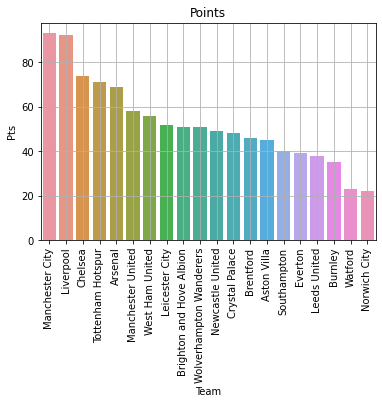

In [171]:
#Teams ranked by points
plt.figure()
sns.barplot(x='Team', y='Pts',data=points_stats).set_title('Points')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
#sns.barplot(x = 'Team')

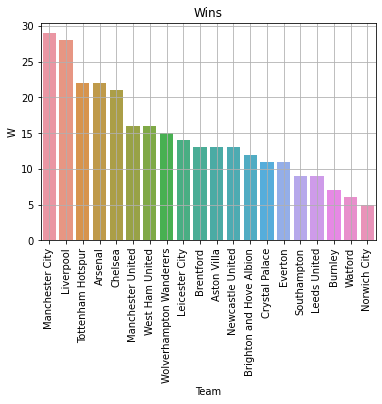

In [172]:
#Teams ranked by Wins
plt.figure()
sns.barplot(x='Team', y='W',data=points_stats, order=points_stats.sort_values('W',ascending=False).Team).set_title('Wins')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
#sns.barplot(x = 'Team')

In [173]:
#QUESTION: how to sort this properly 
chelsea_wins = points_stats[points_stats.Team == 'Chelsea'][['Team','W']]
ars_wins = points_stats[points_stats.Team == 'Arsenal'][['Team','W']]
spurs_wins = points_stats[points_stats.Team == 'Tottenham Hotspur'][['Team','W']]
print(chelsea_wins)
print(ars_wins)
print(spurs_wins)

      Team   W
2  Chelsea  21
      Team   W
4  Arsenal  22
                Team   W
3  Tottenham Hotspur  22


As seen with the graph, Manchester City and Liverpool ended the season with significantly more wins than the rest of the competitors. Spurs and Arsenal were tied on wins, however Arsenal had more losses which meant Spurs took 4th place. Chelsea, despite having fewer wins than both Spurs and Arsenal, managed to obtain 3rd. 

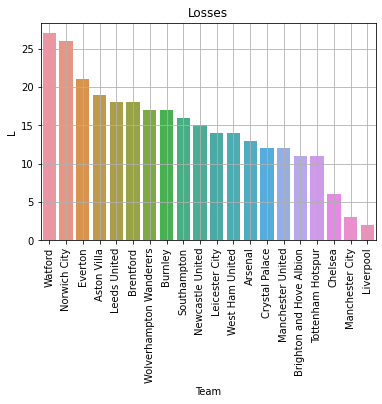

In [174]:
#Teams with most losses
plt.figure()
sns.barplot(x='Team', y='L',data=points_stats,order=points_stats.sort_values('L',ascending=False).Team).set_title('Losses')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

The losses graph shows that despite Liverpool having fewer losses than Man City, they still failed to win the league. The most surprising was BHA, as it had fewer losses than 3 of the top 6 teams, yet they only finished 9th behind Leicester(who are ranked 11th on losses during a season)

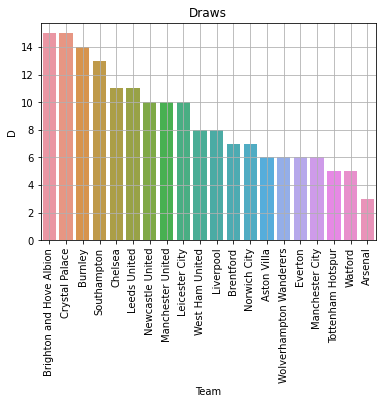

In [175]:
#team with most draws
plt.figure()
sns.barplot(x='Team', y='D',data=points_stats,order=points_stats.sort_values('D',ascending=False).Team).set_title('Draws')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [176]:
#calculating the averages

#avg. goals scored
points_stats['Scored_Avg'] = (points_stats['GF']/points_stats['Pld'])

#average goals conceeded
points_stats['Conceed_Avg'] = (points_stats['GA']/points_stats['Pld'])

points_stats

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Scored_Avg,Conceed_Avg
0,1,Manchester City,38,29,6,3,99,26,73,93,2.605263,0.684211
1,2,Liverpool,38,28,8,2,94,26,68,92,2.473684,0.684211
2,3,Chelsea,38,21,11,6,76,33,43,74,2.000000,0.868421
3,4,Tottenham Hotspur,38,22,5,11,69,40,29,71,1.815789,1.052632
4,5,Arsenal,38,22,3,13,61,48,13,69,1.605263,1.263158
5,6,Manchester United,38,16,10,12,57,57,0,58,1.500000,1.500000
6,7,West Ham United,38,16,8,14,60,51,9,56,1.578947,1.342105
7,8,Leicester City,38,14,10,14,62,59,3,52,1.631579,1.552632
8,9,Brighton and Hove Albion,38,12,15,11,42,44,-2,51,1.105263,1.157895
9,10,Wolverhampton Wanderers,38,15,6,17,38,43,-5,51,1.000000,1.131579


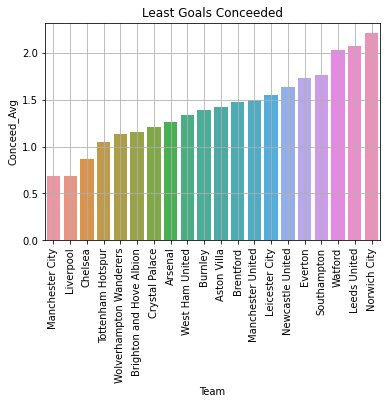

In [177]:
#best defensive team: ranked by least goals conceeded
plt.figure()
sns.barplot(x='Team', y='Conceed_Avg',data=points_stats,order=points_stats.sort_values('Conceed_Avg',ascending=True).Team).set_title('Least Goals Conceeded')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

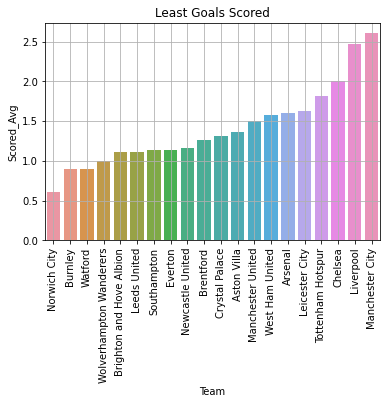

In [178]:
#worst attacking team
#highlight if team was in top 6
plt.figure()
sns.barplot(x='Team', y='Scored_Avg',data=points_stats,order=points_stats.sort_values('Scored_Avg',ascending=True).Team).set_title('Least Goals Scored')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

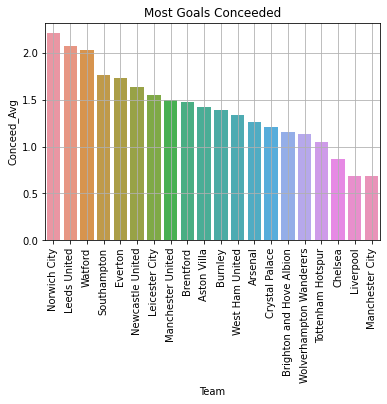

In [179]:
#worst defensive team
plt.figure()
sns.barplot(x='Team', y='Conceed_Avg',data=points_stats,order=points_stats.sort_values('Conceed_Avg',ascending=False).Team).set_title('Most Goals Conceeded')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

##